In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
pd.set_option('display.max_columns',30)
import numpy as np

In [2]:
#Importing the dataset
df = pd.read_csv('/content/Warehouse Report run the draft.csv', header = 1)


In [3]:
df.head(5)

,ITEM ID,LIST OF ITEMS,SKU,\n Warehouse Name\n,Item Type,Purchase Invoice Channel,Order Priority,Order Date,Order ID,Qty Ordered,Qty in,Qty out,Stock On Hand,Committed Stock,Available for sale,status,unit,Selling Price,Cost Price,created_by,Total money on hold,Item Availability rating,OFFLINE rating,Online booking Rating,Packaging Rating,Delivery Rating
0,4051872000000512232,Product 1,7.388505e+11,TX Boyz Wholesale,Cosmetics,Offline,LOW/MEDIUM,2023-03-02,15157614,128868,106780,66204,40576,4332,36244,active,pcs,3.57,2.75,xyz,36955,4.0,2,3,3,0.0
1,4051872000000242010,Product 2,3.846754e+11,Tx Boyz Wholesale A#103,Cosmetics,Offline,LOW/MEDIUM,2019-02-13,57105109,145707,120733,74854,45878,34596,11282,active,pcs,8.45,6.50,xyz,56510,2.0,2,3,4,4.0
2,4051872000002001964,Product 3,8.591984e+11,TEXAS DISTRIBUTION,Novelities,Online,MOST PRIORITY,2023-08-14,15319448,136952,113478,70357,43122,1000,42122,active,PCS,17.00,13.75,xyz,32057,0.0,2,2,3,NaN
3,4051872000000383602,Product 4,5.097334e+11,TX Boyz WHOLESALE-khaled,Cosmetics,Offline,LOW,2016-11-02,43709238,123910,102672,63656,39015,9096,29919,active,PCS,8.45,6.50,xyz,39284,4.0,3,1,1,0.0
4,4051872000003592104,Product 5,5.255261e+11,TX Boyz Wholesale,ExoticDrinks,Offline,MEDIUM,2019-01-13,64467696,132856,110084,68252,41832,5661,36171,active,PCS,3.00,2.25,xyz,28408,3.0,4,2,2,0.0


In [4]:
##exploring the information about the dataset and its datatypes, columns and non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28179 entries, 0 to 28178
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ITEM ID                             28179 non-null  int64  
 1   LIST OF ITEMS                       28179 non-null  object 
 2   SKU                                 28156 non-null  float64
 3   
          Warehouse Name
          28179 non-null  object 
 4   Item Type                           28179 non-null  object 
 5   Purchase Invoice Channel            28179 non-null  object 
 6   Order Priority                      28179 non-null  object 
 7   Order Date                          28179 non-null  object 
 8   Order ID                            28179 non-null  int64  
 9   Qty Ordered                         28179 non-null  int64  
 10  Qty in                              28179 non-null  int64  
 11  Qty out                             28179

##Outliers


We have Identified outliers and kept it like that only without solving it because we needed those outliers for future demand forecasting.

In [5]:
#Extracting quantitative columns to detect outliers
numerical_col = df.select_dtypes(include = ['int64','float64'])

In [7]:
print(numerical_col)

                   ITEM ID           SKU  Order ID  Qty Ordered  Qty in  \
0      4051872000000512232  7.388505e+11  15157614       128868  106780   
1      4051872000000242010  3.846754e+11  57105109       145707  120733   
2      4051872000002001964  8.591984e+11  15319448       136952  113478   
3      4051872000000383602  5.097334e+11  43709238       123910  102672   
4      4051872000003592104  5.255261e+11  64467696       132856  110084   
...                    ...           ...       ...          ...     ...   
28174  4051872000344326104  4.697016e+11  26659690       127291  105473   
28175  4051872000465305560  3.470448e+11  39114350       141258  117046   
28176  4051872000628096987  8.359564e+11  56752042       123055  101963   
28177  4051872000519176159  7.246617e+11  94200465       129012  106899   
28178  4051872000512098285  5.790989e+11  88340387       142158  117792   

       Qty out  Stock On Hand  Committed Stock  Available for sale  \
0        66204          40576

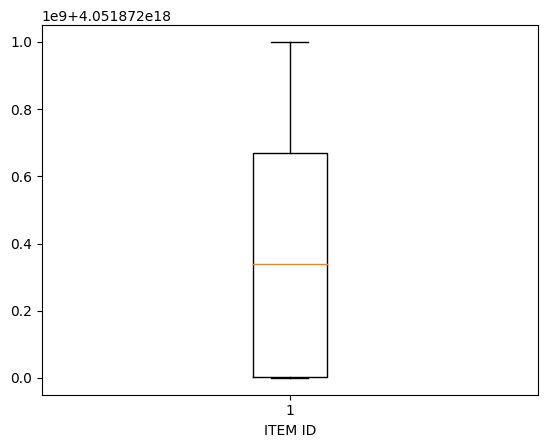

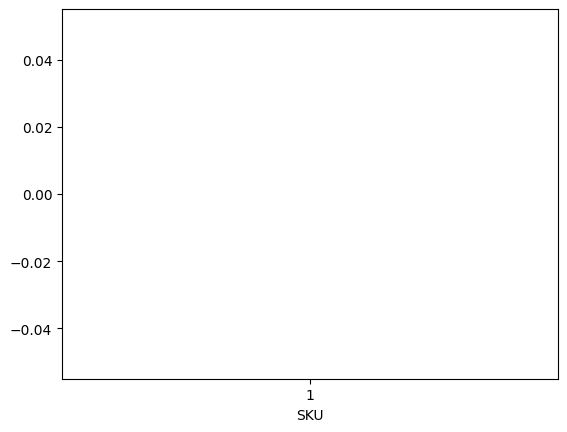

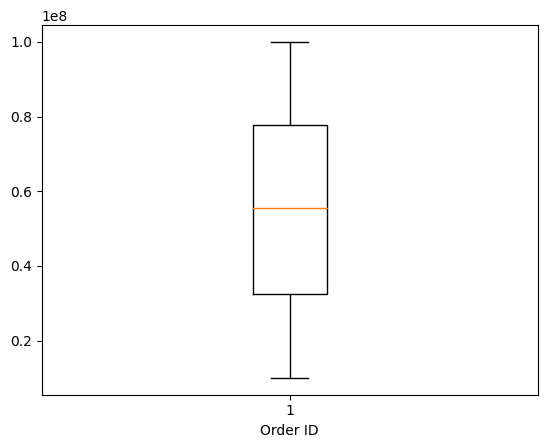

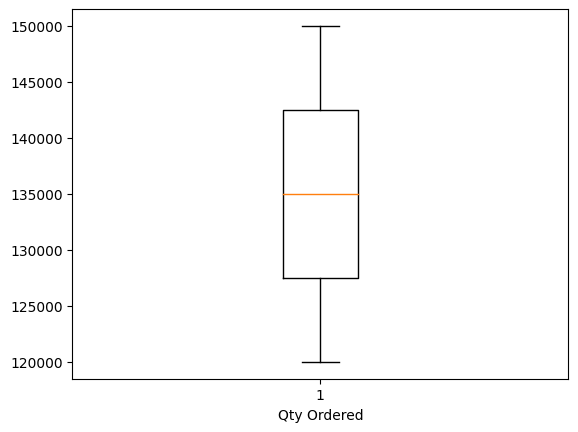

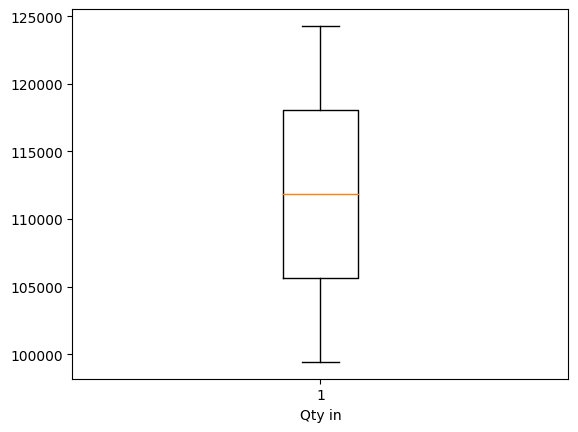

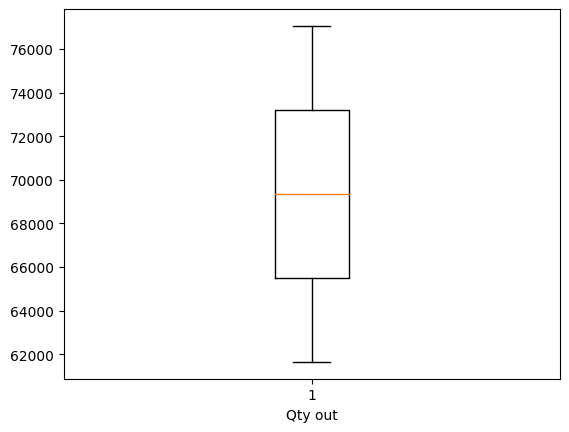

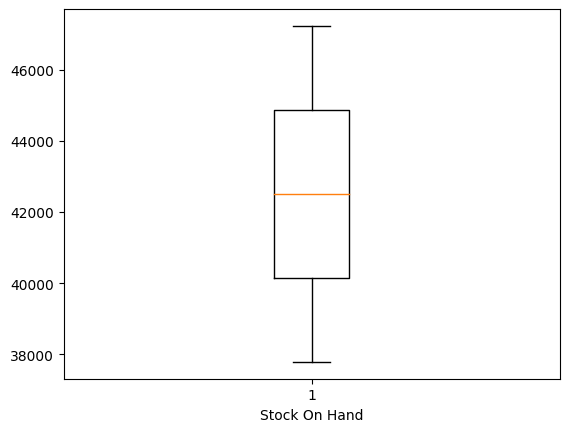

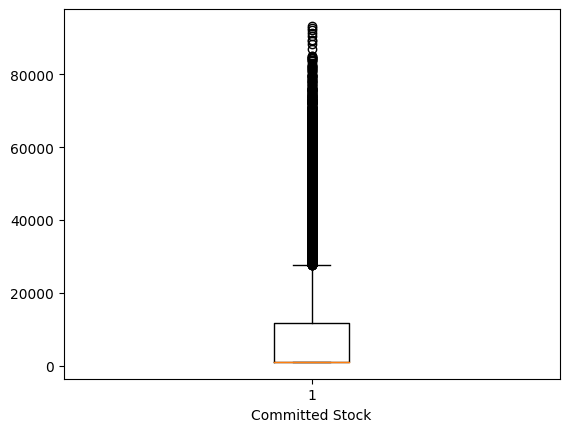

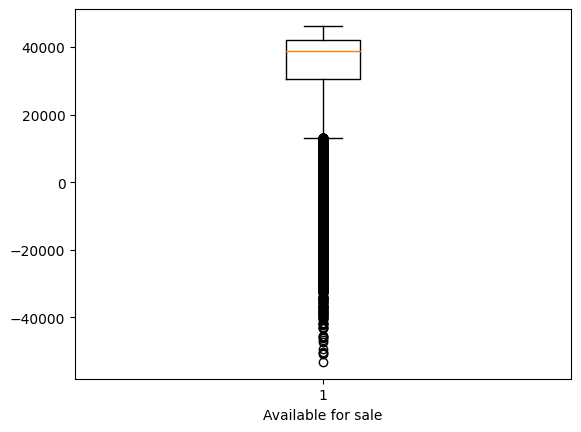

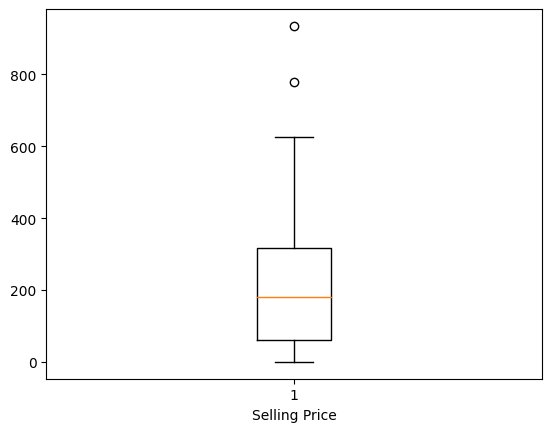

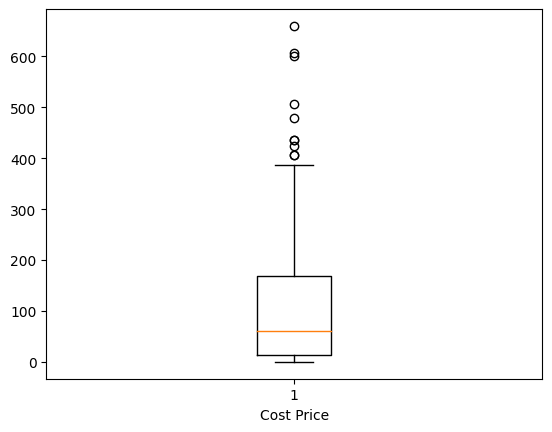

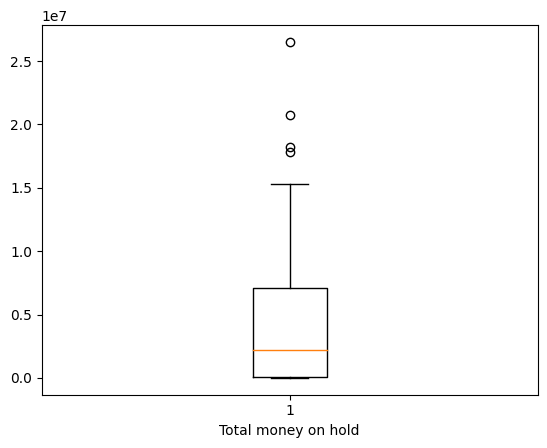

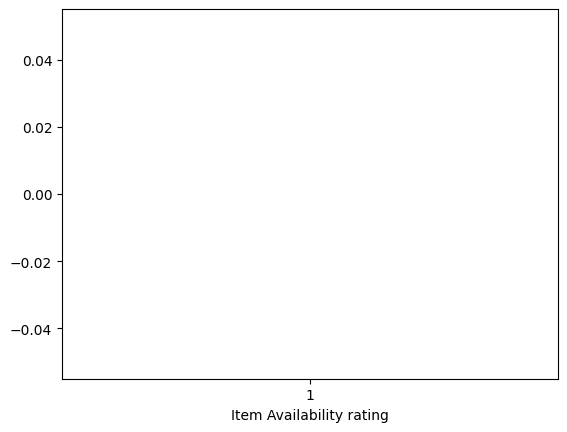

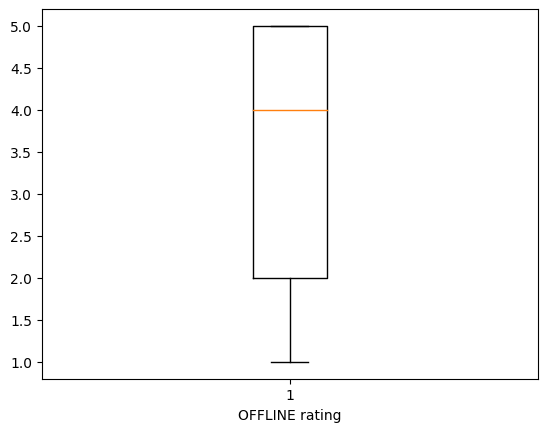

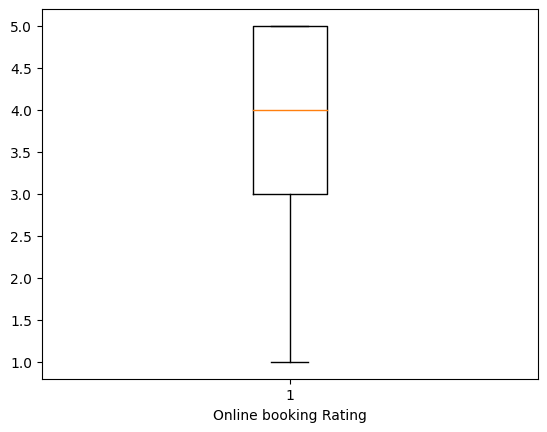

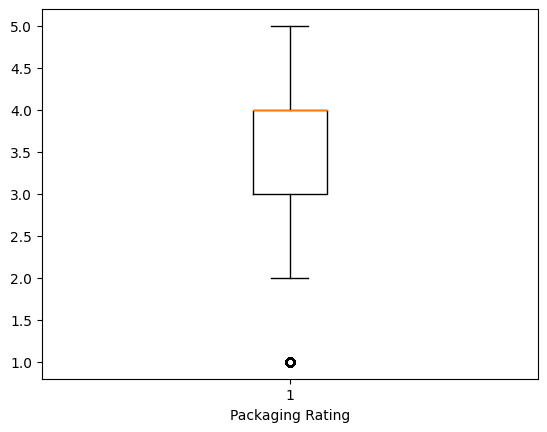

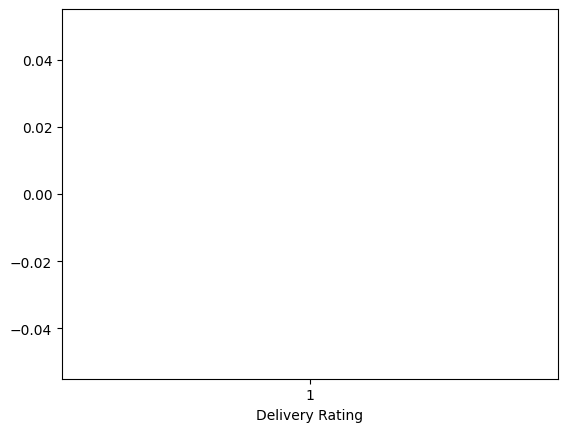

In [8]:
#Determination of Outliers
for col in numerical_col.columns.tolist():
    plt.boxplot(x=col,data=numerical_col)
    plt.xlabel(col)
    plt.show()

## Descriptive Statistics

In [9]:
#Dropping duplicates and non relevant columns
df.drop_duplicates(inplace=True)
df.drop(['ITEM ID', 'SKU'],axis=1,inplace=True)
df.describe()

,Order ID,Qty Ordered,Qty in,Qty out,Stock On Hand,Committed Stock,Available for sale,Selling Price,Cost Price,Total money on hold,Item Availability rating,OFFLINE rating,Online booking Rating,Packaging Rating,Delivery Rating
count,2.817900e+04,28179.000000,28179.000000,28179.000000,28179.000000,28179.000000,28179.000000,28179.000000,28179.000000,2.817900e+04,28172.000000,28179.000000,28179.000000,28179.000000,23941.000000
mean,5.516339e+07,134988.125696,111851.068633,69347.661556,42503.406579,9044.607474,33458.799106,193.387409,95.442977,3.812247e+06,2.995882,3.506476,3.491927,3.549487,3.496846
std,2.601632e+07,8663.006096,7178.160407,4450.457240,2727.699111,14040.331362,14319.415985,141.303082,91.233916,4.045959e+06,1.487104,1.355786,1.295489,1.221622,1.294404
min,1.000045e+07,120002.000000,99434.000000,61649.000000,37785.000000,1000.000000,-53144.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000
25%,3.255862e+07,127456.000000,105610.000000,65478.000000,40132.000000,1000.000000,30590.500000,61.450000,13.000000,6.489350e+04,2.000000,2.000000,3.000000,3.000000,3.000000
50%,5.554572e+07,134989.000000,111852.000000,69348.000000,42504.000000,1000.000000,38680.000000,179.760000,60.130000,2.193042e+06,3.000000,4.000000,4.000000,4.000000,4.000000
75%,7.785211e+07,142476.000000,118055.500000,73194.500000,44861.000000,11690.000000,42209.500000,317.690000,168.170000,7.112802e+06,4.000000,5.000000,5.000000,4.000000,5.000000
max,9.999901e+07,149999.000000,124289.000000,77059.000000,47230.000000,93295.000000,46230.000000,935.000000,660.000000,2.650138e+07,5.000000,5.000000,5.000000,5.000000,5.000000


##Exploratory Data Analysis

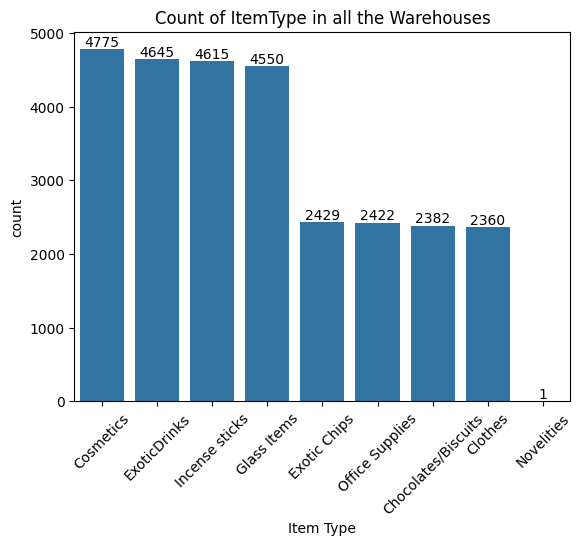

In [10]:
#Exhibiting the count of items
ax = sb.countplot(x='Item Type', data=df, order = df['Item Type'].value_counts(ascending=False).index)
abs_values = df['Item Type'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.title('Count of ItemType in all the Warehouses')
plt.xticks(rotation=45)
plt.show()

From the figure count of item type in operational conditions, it's apparent that the warehouse holds a greater quantity of cosmetics compared to other items. This suggests that cosmetics are one of the most abundant products in the inventory. Following cosmetics, Exotic Chips, Office Supplies, and Chocolates/Biscuits are within a similar range of availability. These items seem to have comparable quantities in stock.
On the other hand, novelties appear to be the least stocked item in the warehouse, indicating that they have the lowest availability among the nine types of items.
In summary, the bar graph provides insights into the distribution of items in the warehouse, showing that cosmetics dominate the inventory while novelties have the lowest representation. This understanding can be crucial for inventory management and resource allocation within the warehouse.



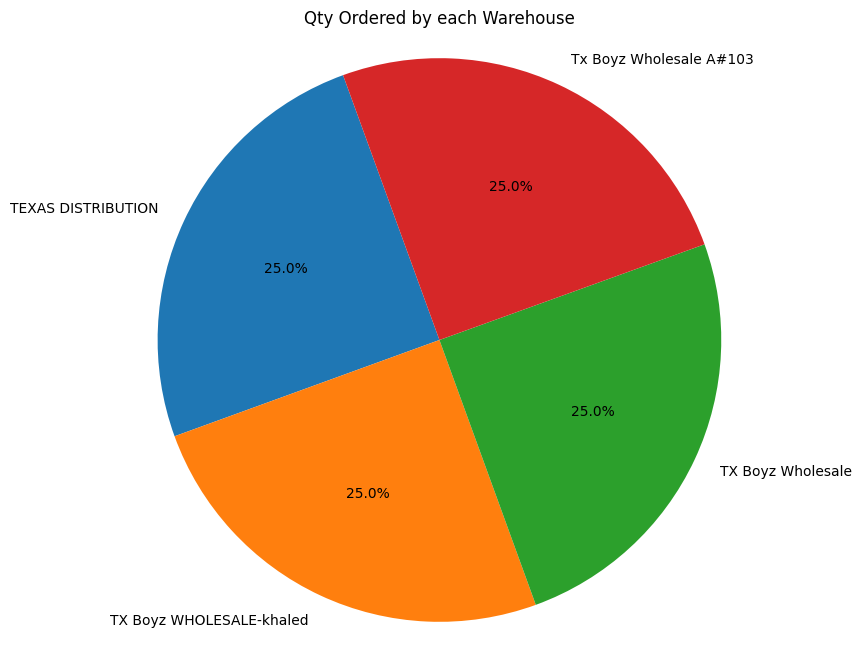

In [11]:
#Determining the Qty ordered by each warehouses
Warehouses_listed = '\n          Warehouse Name\n        '
qty_ordered_by_each_Warehouse = 'Qty Ordered'
qty_in_each_warehouse = df.groupby(Warehouses_listed)[qty_ordered_by_each_Warehouse].sum()
plt.figure(figsize = (8,8))
plt.pie(qty_in_each_warehouse, labels = qty_in_each_warehouse.index, autopct='%1.1f%%', startangle= 110 )
plt.title("Qty Ordered by each Warehouse")
plt.axis('equal')
plt.show()

From the pie chart we can observe that every order is equally shared between the warehouses, which maintains balance in inventory management.

In [14]:
df.columns

Index(['ITEM ID', 'LIST OF ITEMS', 'SKU',
       '\n          Warehouse Name\n        ', 'Item Type',
       'Purchase Invoice Channel', 'Order Priority', 'Order Date', 'Order ID',
       'Qty Ordered', 'Qty in', 'Qty out', 'Stock On Hand', 'Committed Stock',
       'Available for sale', 'status', 'unit', 'Selling Price', 'Cost Price',
       'created_by', 'Total money on hold', 'Item Availability rating',
       'OFFLINE rating', 'Online booking Rating', 'Packaging Rating',
       'Delivery Rating', 'Order_Date', 'Order Year'],
      dtype='object')

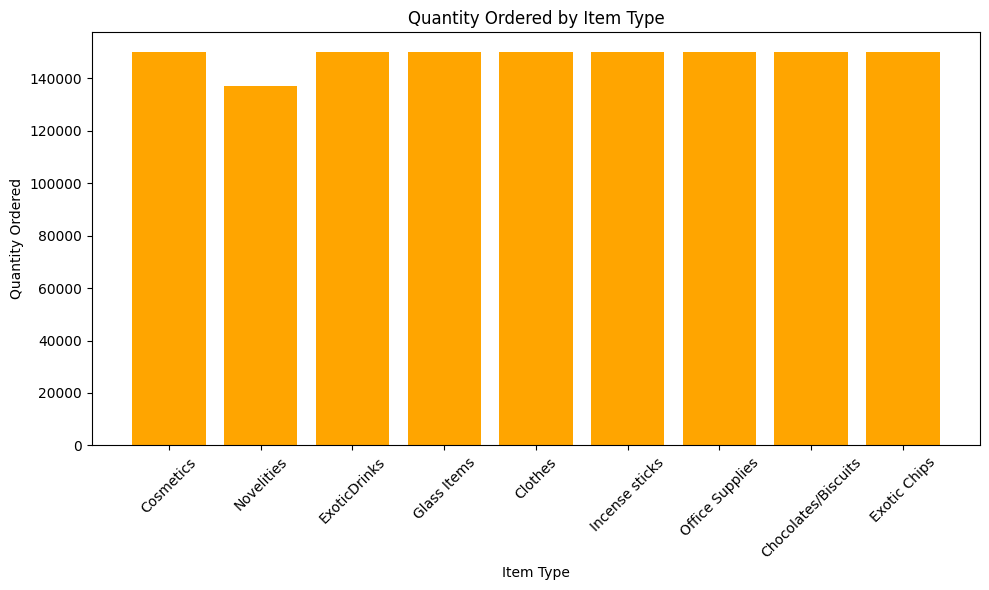

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(df['Item Type'], df['Qty Ordered'], color='orange')
plt.xlabel('Item Type')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered by Item Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [9]:
df['Order_Date'] = pd.to_datetime(df['Order Date'])

In [10]:
df['Order Year'] = df['Order_Date'].dt.year

In [11]:
#Order priority of the item type yearwise
Yearwise_df =  pd.pivot_table(data=df , index = 'Order Year' , columns ='Order Priority' ,values = 'Order ID' , aggfunc='count')

In [13]:
Yearwise_df

Order Priority,HIGH,LOW,LOW/MEDIUM,MEDIUM,MOST PRIORITY
Order Year,,,,,
2015,712.0,676.0,NaN,669.0,665.0
2016,765.0,719.0,NaN,721.0,702.0
2017,689.0,700.0,NaN,699.0,690.0
2018,699.0,740.0,NaN,710.0,716.0
2019,716.0,714.0,1.0,667.0,706.0
2020,700.0,713.0,NaN,688.0,743.0
2021,702.0,736.0,NaN,707.0,698.0
2022,696.0,695.0,NaN,709.0,713.0
2023,670.0,756.0,1.0,705.0,716.0


In [ ]:
#Sum of quantity of item types ordered yearwise
Yearwise_df_1 =  pd.pivot_table(data=df , index = 'Order Year' , columns ='Item Type' ,values = 'Qty Ordered' , aggfunc='sum')

In [ ]:
Yearwise_df_1

Item Type,Chocolates/Biscuits,Clothes,Cosmetics,Exotic Chips,ExoticDrinks,Glass Items,Incense sticks,Novelities,Office Supplies
Order Year,,,,,,,,,
2015,29771977.0,29014365.0,65130484.0,32288018.0,58275314.0,61257246.0,61988809.0,NaN,29960477.0
2016,32137367.0,35581307.0,68587817.0,36819163.0,61674978.0,62597746.0,61026347.0,NaN,34145122.0
2017,29748103.0,32113089.0,62690259.0,32960795.0,63993063.0,61334578.0,59462401.0,NaN,32790225.0
2018,30378958.0,29953504.0,69277665.0,30594858.0,60176122.0,64207882.0,66262002.0,NaN,35277561.0
2019,31752112.0,32111272.0,62813294.0,31775973.0,63077015.0,65691921.0,60448984.0,NaN,31238372.0
2020,32774540.0,32519246.0,61395273.0,34196007.0,64951955.0,62588326.0,64828033.0,NaN,30285154.0
2021,35359444.0,30937672.0,68223331.0,32982256.0,63468434.0,56905889.0,60687196.0,NaN,35219260.0
2022,33650537.0,31568395.0,59037988.0,31397379.0,63291503.0,61625613.0,67453333.0,NaN,31971265.0
2023,32149442.0,32600762.0,65247251.0,35258791.0,67198084.0,56612675.0,61683930.0,136952.0,33198677.0


Text(0.5, 1.0, 'Qty ordered for each ItemType Year Wise')

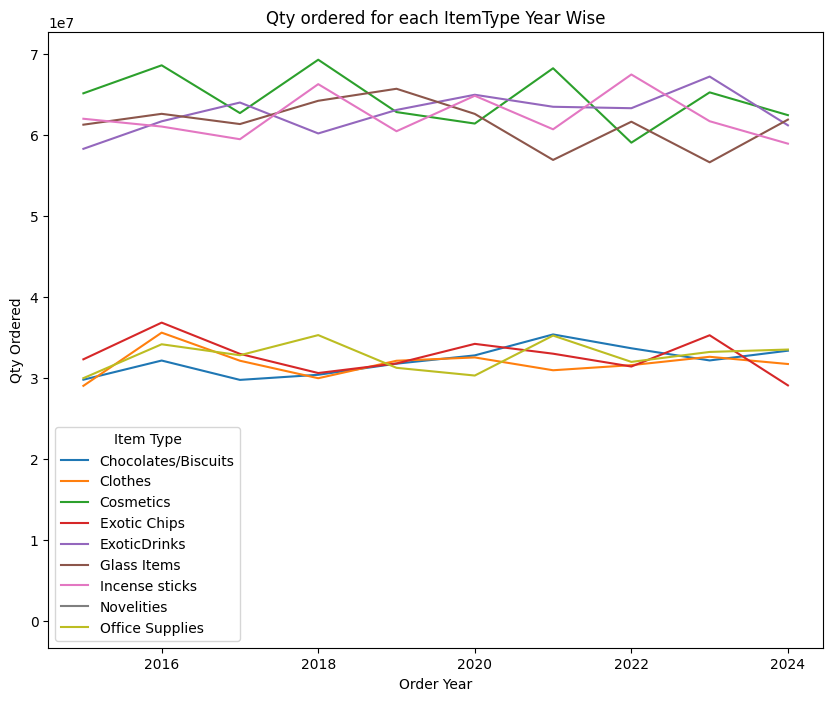

In [ ]:
#How much quantity was ordered for each item from 2015-2024 ?
Yearwise_df_1.plot(figsize=(10,8))
plt.xlabel('Order Year')
plt.ylabel('Qty Ordered')
plt.title('Qty ordered for each ItemType Year Wise')


The above line graph figure shows quantity ordered for each Item type yearly. Cosmetics, incense sticks, exotic drinks, and glass items are the most selling item types, and they re-ordered those items. All the categories show some variations in the quantities year to year.

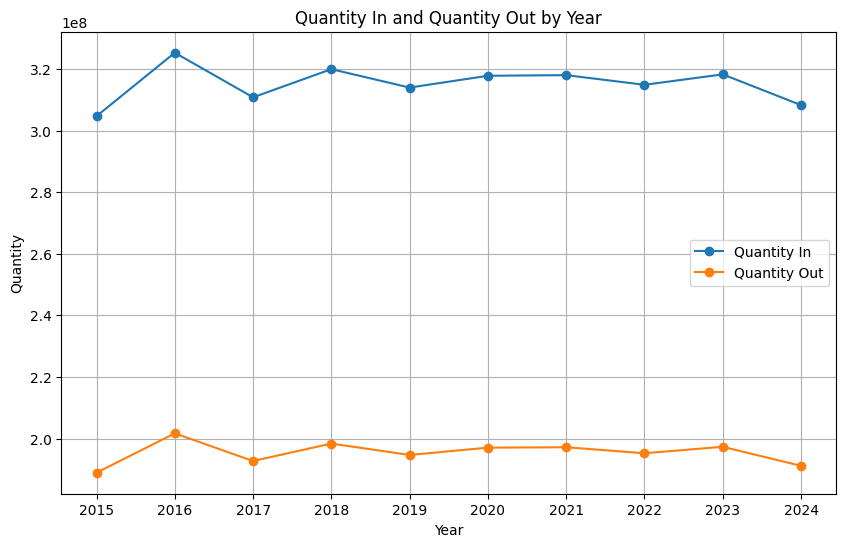

In [ ]:
#How much was the quantity in and quantity out yearwise?
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['year'] = df['Order Date'].dt.year


In_and_out = df.groupby('year')[['Qty in', 'Qty out']].sum()

plt.figure(figsize=(10, 6))
plt.plot(In_and_out.index, In_and_out['Qty in'], marker='o', label='Quantity In')
plt.plot(In_and_out.index, In_and_out['Qty out'], marker='o', label='Quantity Out')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.title('Quantity In and Quantity Out by Year')
plt.xticks(In_and_out.index)
plt.legend()
plt.grid(True)
plt.show()

The above graph depicts that the quantity coming into inventory is always greater than the quantity going out of the inventory. This could lead to miscarriage of the expired products. It is almost 1.6 times the difference between the quantity in and quantity out. Our most intake and outgoing products were from inventory in 2016. But constantly we can see that whenever we take a certain amount of quantity approximately the same amount of the quantity of the products are going out. We can see that qty_in and qty_out are directly proportinal to each other.

In [ ]:
#Qty ordered vs Qty in for each item
x =pd.pivot_table(data=df,index='Item Type' , values = ['Qty Ordered','Qty in'] , aggfunc=np.sum)

In [ ]:
x

,Qty Ordered,Qty in
Item Type,,
Chocolates/Biscuits,321075530,266042969
Clothes,318108144,263584175
Cosmetics,644837943,534312278
Exotic Chips,327343621,271236704
ExoticDrinks,627284874,519767821
Glass Items,614707148,509345922
Incense sticks,622754791,516014207
Novelities,136952,113478
Office Supplies,327581391,271433709


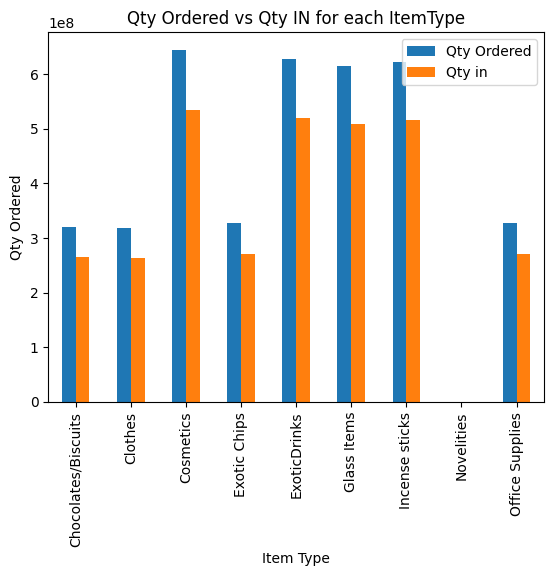

In [ ]:
x.plot.bar()
plt.xlabel('Item Type')
plt.ylabel('Qty Ordered')
plt.title('Qty Ordered vs Qty IN for each ItemType')
plt.show()

Bar graph showing the Qty ordered vs Oty IN for each ItemType respectively. From point of operational efficiency and effectiveness having more number of Qty ordered is good enough for inventory management and meeting the demand forecast for sales.

In [ ]:
#Calculation of profit percentage
df['Profit %']  = (df['Selling Price']-df['Cost Price'])/df['Cost Price']

In [ ]:
#Profit margin for each items
profitmargin = pd.pivot_table(data=df , index= 'Order Year' , columns='Item Type' , values ='Profit %' , aggfunc='mean')

In [ ]:
profitmargin

Item Type,Chocolates/Biscuits,Clothes,Cosmetics,Exotic Chips,ExoticDrinks,Glass Items,Incense sticks,Novelities,Office Supplies
Order Year,,,,,,,,,
2015,5.539937,5.575766,6.428788,4.166167,6.008516,7.291281,11.335618,NaN,6.232022
2016,6.523248,6.160604,5.505704,9.053539,5.423189,5.069736,6.598635,NaN,7.099502
2017,6.754144,4.240078,7.575578,5.328179,6.898602,6.073508,8.376088,NaN,4.167332
2018,6.988597,5.474024,4.874900,5.015777,7.766116,3.478458,6.862289,NaN,8.797669
2019,4.782575,7.475308,7.984348,7.959434,6.523837,6.561197,7.336759,NaN,3.814456
2020,6.713227,8.490453,10.895663,9.850569,5.498321,5.410133,5.383544,NaN,6.517857
2021,5.353256,30.063189,8.379610,8.972164,14.248471,7.499043,6.953110,NaN,5.354607
2022,7.066624,5.381739,7.230758,5.651768,6.803586,6.980632,6.361532,NaN,9.515966
2023,5.820349,5.998738,5.914504,4.663290,5.761381,24.224278,7.770798,0.236364,5.418570


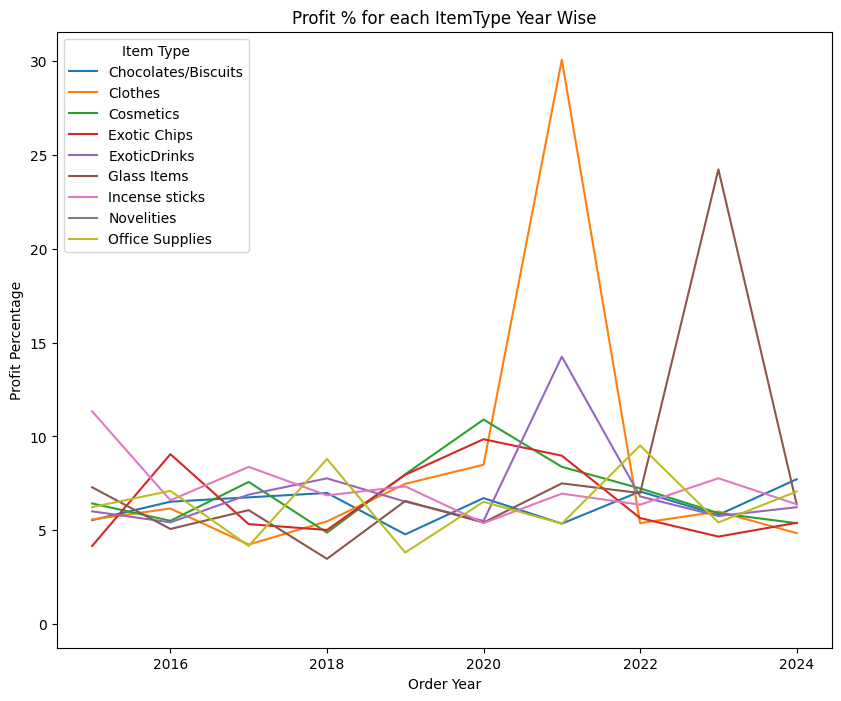

In [ ]:
#Contribution of profit % yearwise by each item
profitmargin.plot.line(figsize=(10,8))
plt.xlabel('Order Year')
plt.ylabel('Profit Percentage')
plt.title('Profit % for each ItemType Year Wise')
plt.show()

The above figure shows the profit percentage for each Item year wise. Item types were sold every year, and each item type was facing ups and downs. In the initial year incense stick was the major profit contribution item. The clothes initially were getting lower profit% but in the year 2021, it made the highest profit %, contributing 30%, and declined in the upcoming year, from the general analysis, the US clothing got rise in 2021. This rise was due to the demand recovery after COVID - 19 pandemic. Glass items that made the least profit in the year 2018 drastically improved their profit by 2023 approximately contributing 25%. The item novelties never contributed to the profit % because there was only 1 item sold.

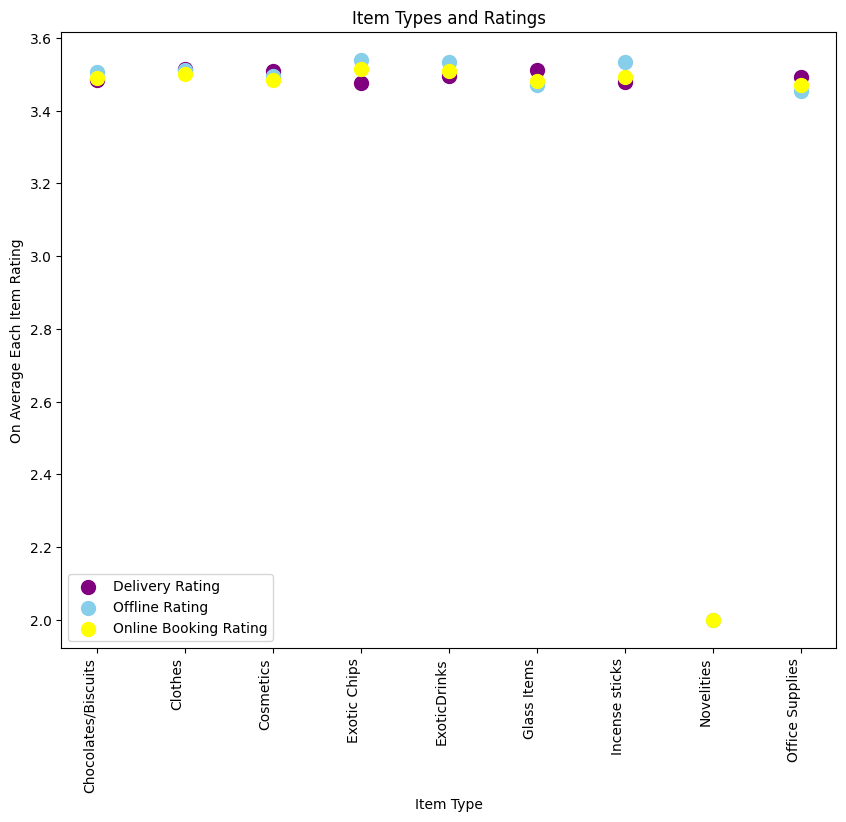

In [ ]:
#Average Ratings gained by each items
Average_delivery_ratings = df.groupby('Item Type')['Delivery Rating'].mean()
Average_offline_ratings = df.groupby('Item Type')['OFFLINE rating'].mean()
Average_online_booking_ratings = df.groupby('Item Type')['Online booking Rating'].mean()

plt.figure(figsize=(10, 8))
plt.scatter(Average_delivery_ratings.index, Average_delivery_ratings.values, color='purple', label='Delivery Rating', s=100)
plt.scatter(Average_offline_ratings.index, Average_offline_ratings.values, color='skyblue', label='Offline Rating', s=100)
plt.scatter(Average_online_booking_ratings.index, Average_online_booking_ratings.values, color='yellow', label='Online Booking Rating', s=100)

plt.xlabel('Item Type')
plt.ylabel('On Average Each Item Rating')
plt.title('Item Types and Ratings')
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()


Plot showing ItemTypes and their ratings(Delivery Rating, Offline Rating, Online Booking Rating). For all the items offline rating was more approximately 3.5 compared to online ratings except for glass items and office supplies. There was only 1 novelty order and the rating was bad.Delivery rating were also good competing with other ratings.

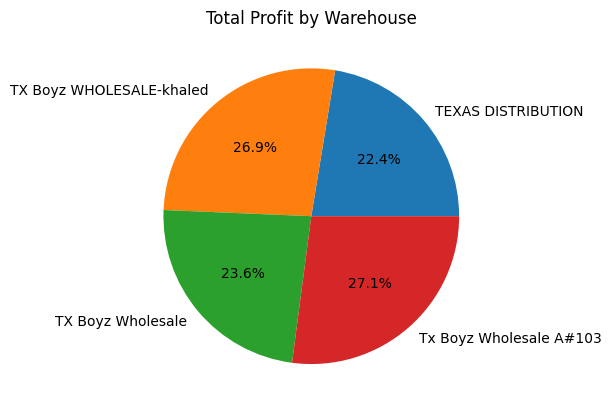

In [ ]:
# Calculating the total profit for each warehouse based on profit%
profit_percentage = df.groupby('\n          Warehouse Name\n        ')['Profit %'].sum()

# Creating a pie chart of the total profit for each warehouse
plt.pie(profit_percentage, labels=profit_percentage.index, autopct="%1.1f%%")
plt.title("Total Profit by Warehouse")
plt.show()

The above pie chart shows the profit earned by each warehouse. Tx Boyz Wholesale A#103 being the most profitable and TEXAS DISTRIBUTION being the least profitable among the 4 warehouses.

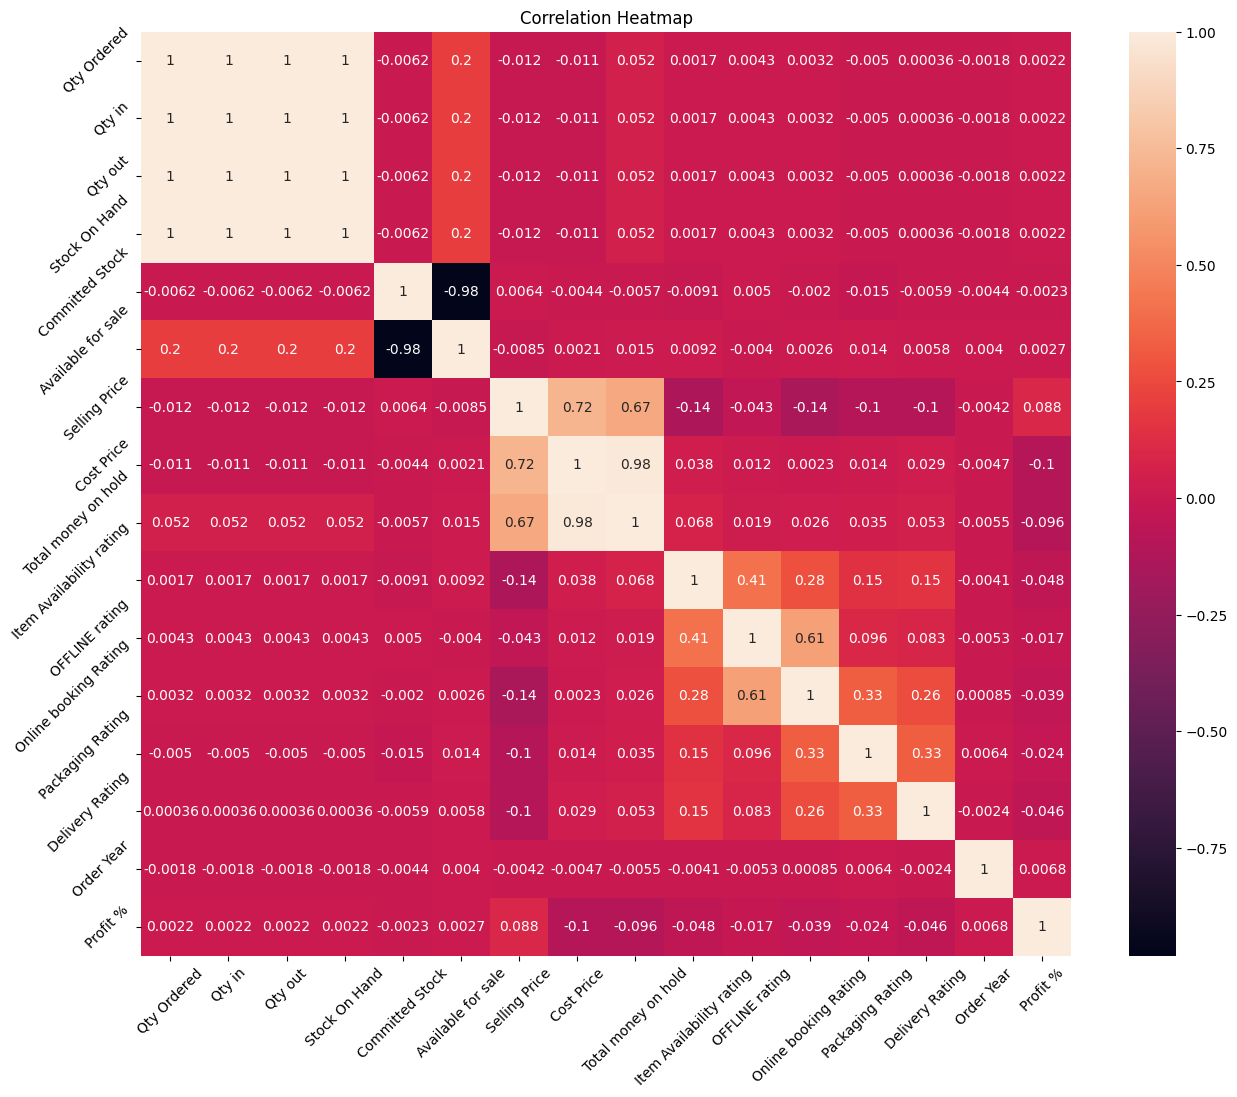

In [ ]:
#Heat map for correlation
df1 = df.drop(columns=['LIST OF ITEMS','\n          Warehouse Name\n        ', 'Order Priority', 'Purchase Invoice Channel',
                       'Item Type', 'status','unit', 'Order Date', 'Order ID','year','Order_Date','created_by' ])
# Calculate the correlation matrix
corr = df1.corr()

# Create a new figure for the heatmap
fig, ax = plt.subplots(figsize=(15, 12))

# Create the heatmap
sb.heatmap(corr, annot=True, ax=ax)

# Rotate x and y labels to prevent overlapping
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [ ]:
# Highest Quantity ordered, highest sales, highest profit earned based on item type
# Group data by 'Item Type' and calculate total sales, total quantity ordered, and total profits
item_sales_data = df.groupby('Item Type').agg(
    Total_Sales=('Selling Price', 'sum'),
    Total_Quantity_Ordered=('Qty Ordered', 'sum'),
    Total_Profits_Earned=('Profit %', 'sum')
).reset_index()

# Sort the data by 'Total_Sales' in descending order to find the item type with the highest sales
item_sales_data = item_sales_data.sort_values(by='Total_Sales', ascending=False)

# Display the item type with the highest sales
print(f"Item Type with the Highest Sales: {item_sales_data.iloc[0]['Item Type']} - ${item_sales_data.iloc[0]['Total_Sales']:.2f}")

# Display the item type with the highest quantity ordered
print(f"Item Type with the Highest Quantity Ordered: {item_sales_data.iloc[0]['Item Type']} - {item_sales_data.iloc[0]['Total_Quantity_Ordered']:.0f} units")

# Display the item type with the highest profits earned
print(f"Item Type with the Highest Profits Earned: {item_sales_data.iloc[0]['Item Type']} - ${item_sales_data.iloc[0]['Total_Profits_Earned']:.2f}")


Item Type with the Highest Sales: Cosmetics - $917412.78
Item Type with the Highest Quantity Ordered: Cosmetics - 644837943 units
Item Type with the Highest Profits Earned: Cosmetics - $32960.69


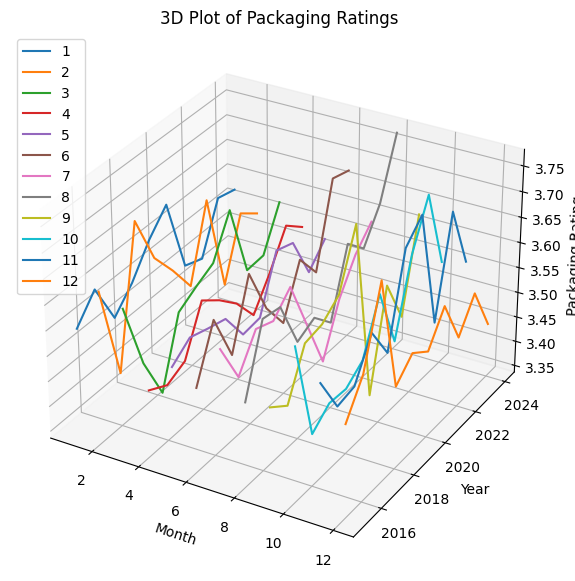

In [ ]:
#3D plot for packaging ratings
df['Month'] = df['Order_Date'].dt.month
subset_df = df.select_dtypes(exclude = 'object')

data = subset_df.groupby(['Order Year','Month']).agg('mean')[['Item Availability rating' ,'Packaging Rating']]
data.reset_index(inplace=True)

fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection='3d')


for i in range(1,len(data['Month'].unique())+1) :
    x = data[data['Month'] == i]
    ax.plot( x['Month'],x['Order Year'], x['Packaging Rating'])
#Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Year')
ax.set_zlabel('Packaging Rating')
ax.set_title('3D Plot of Packaging Ratings')

# Add legend

ax.legend(data['Month'].unique())

# Show plot
plt.show()

##Models

## Question 2

In [ ]:
Demand_Df =  df[['Available for sale','Order Date']]
Demand_Df.head(5)

,Available for sale,Order Date
0,36244,2023-03-02
1,11282,2019-02-13
2,42122,2023-08-14
3,29919,2016-11-02
4,36171,2019-01-13


In [ ]:
Demand_Df.dtypes

Available for sale             int64
Order Date            datetime64[ns]
dtype: object

In [ ]:
# Converting Order Date

print(Demand_Df.dtypes)

## Extracting Month Year from the Order Date column
Demand_Df['Order Date'] = Demand_Df['Order Date'].astype(str)

Demand_Df['Month Year'] = Demand_Df['Order Date'].str.slice(start=0,stop=7)
Demand_Df.info()

Available for sale             int64
Order Date            datetime64[ns]
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28179 entries, 0 to 28178
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Available for sale  28179 non-null  int64 
 1   Order Date          28179 non-null  object
 2   Month Year          28179 non-null  object
dtypes: int64(1), object(2)
memory usage: 660.6+ KB


<ipython-input-196-b20208928adc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Demand_Df['Order Date'] = Demand_Df['Order Date'].astype(str)
<ipython-input-196-b20208928adc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Demand_Df['Month Year'] = Demand_Df['Order Date'].str.slice(start=0,stop=7)


In [ ]:
Demand_Df.head(5)

,Available for sale,Order Date,Month Year
0,36244,2023-03-02,2023-03
1,11282,2019-02-13,2019-02
2,42122,2023-08-14,2023-08
3,29919,2016-11-02,2016-11
4,36171,2019-01-13,2019-01


In [ ]:
# Feature Engineering to create a Demand Column from Available on Sales
# mapping Available for Sale > 0 as 0 and Available for Sale < 0 as Postive Demand
Demand_Df['Demand'] = np.where(Demand_Df['Available for sale'] < 0  , -Demand_Df['Available for sale'] , 0)
Demand_Df['Demand'].describe()

<ipython-input-198-b2f95da3456d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Demand_Df['Demand'] = np.where(Demand_Df['Available for sale'] < 0  , -Demand_Df['Available for sale'] , 0)


count    28179.000000
mean       597.256148
std       3560.012183
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      53144.000000
Name: Demand, dtype: float64

In [ ]:
Final_Df = Demand_Df.groupby(['Month Year']).agg(sum)['Demand'].reset_index()
Final_Df.set_index('Month Year',inplace=True)

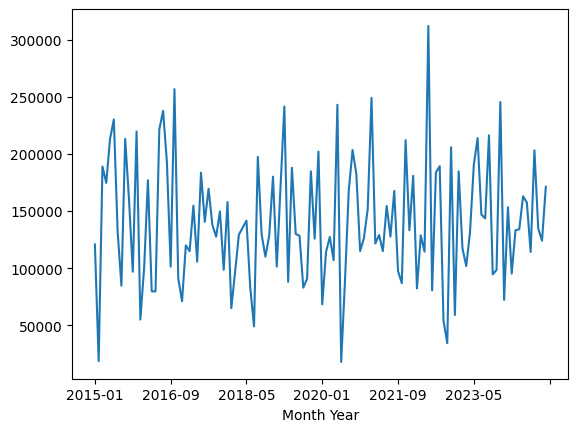

In [ ]:
Final_Df['Demand'].plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(Final_Df['Demand'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -13.043747
p-value: 0.000000


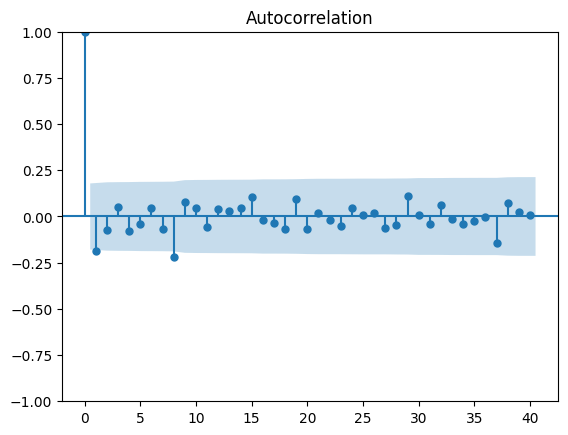

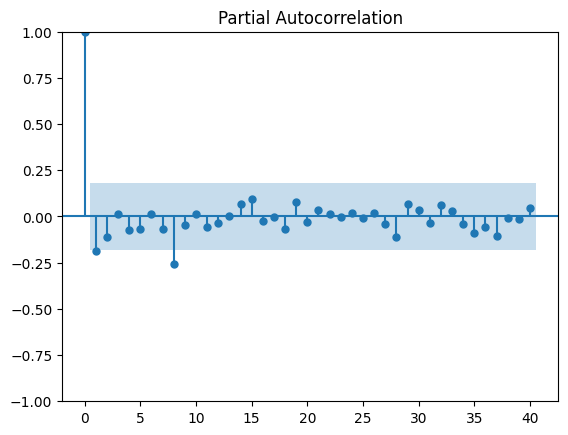

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(Final_Df['Demand'], lags=40)
plot_pacf(Final_Df['Demand'], lags=40)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


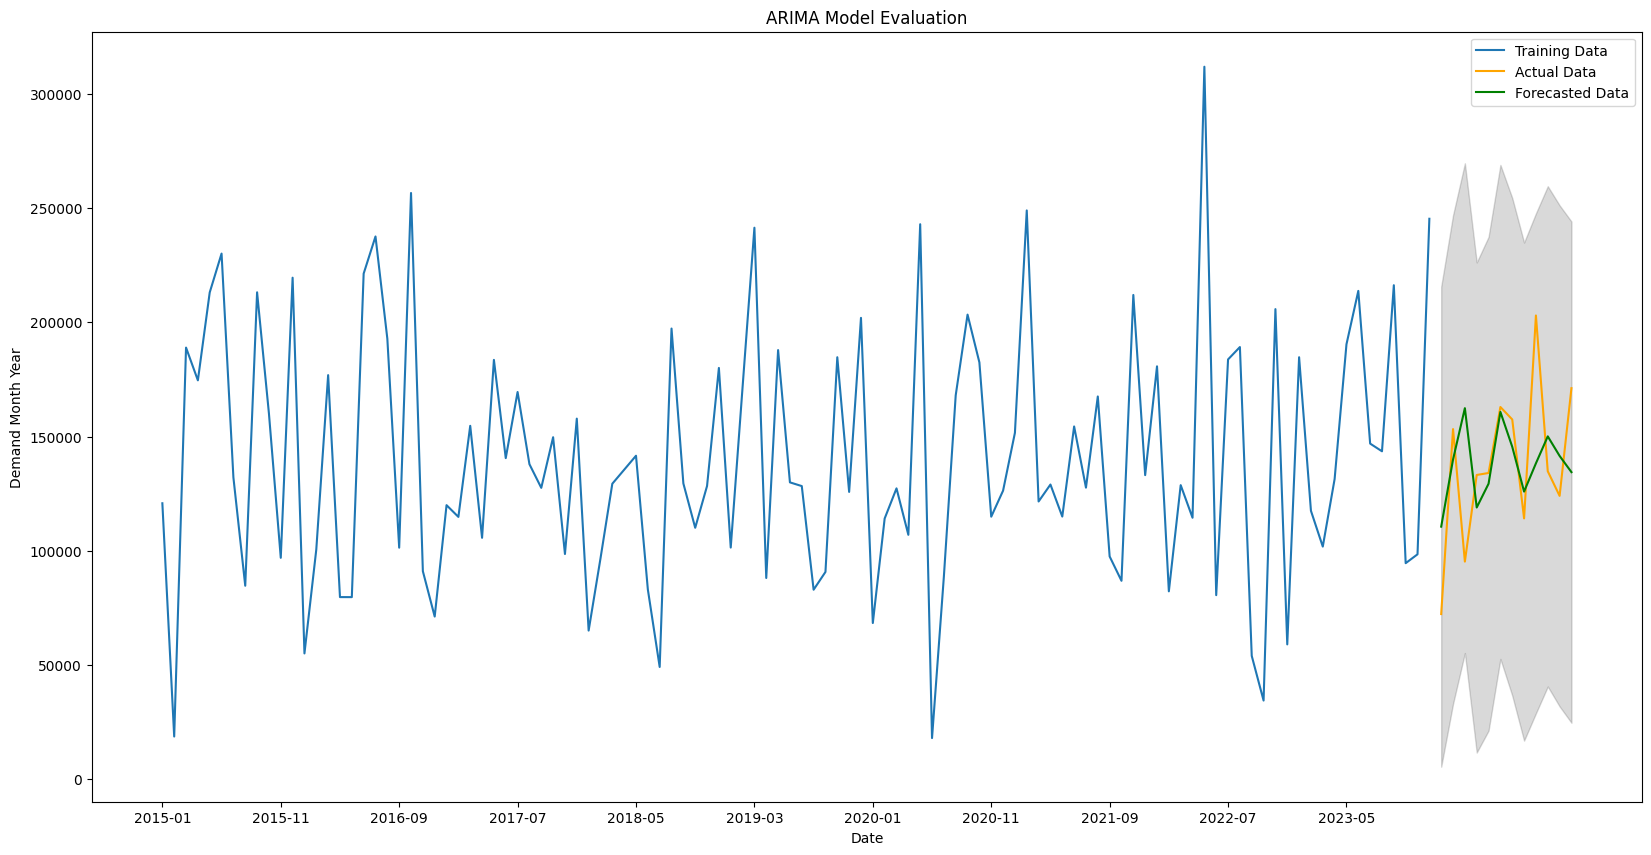

RMSE: 32590.40712222344


In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
mask = Final_Df.index.str.contains(rf"^2024")

train_df = Final_Df[~mask]

test_df = Final_Df[mask]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train_df['Demand'], order=(5, 0, 2))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test_df))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test_df.index)

# Calculate the mean squared error
mse = mean_squared_error(test_df['Demand'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(20,10))
plt.plot(train_df['Demand'], label='Training Data')
plt.plot(test_df['Demand'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test_df.index,
                 test_forecast.conf_int().iloc[:, 0],
                 test_forecast.conf_int().iloc[:, 1],
                 color='k', alpha=.15)
plt.xticks(train_df.index[::10])
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Demand Month Year')
plt.legend()
plt.show()

print('RMSE:', rmse)

In [ ]:
test_forecast_series

Month Year
2024-01    110566.622467
2024-02    139961.216439
2024-03    162441.252715
2024-04    118947.178931
2024-05    129352.962492
2024-06    160791.478540
2024-07    145528.119328
2024-08    125909.326927
2024-09    138286.240056
2024-10    150090.118037
2024-11    141535.141579
2024-12    134425.156419
Name: predicted_mean, dtype: float64

In [ ]:
df.columns

Index(['LIST OF ITEMS', '\n          Warehouse Name\n        ', 'Item Type',
       'Purchase Invoice Channel', 'Order Priority', 'Order Date', 'Order ID',
       'Qty Ordered', 'Qty in', 'Qty out', 'Stock On Hand', 'Committed Stock',
       'Available for sale', 'status', 'unit', 'Selling Price', 'Cost Price',
       'created_by', 'Total money on hold', 'Item Availability rating',
       'OFFLINE rating', 'Online booking Rating', 'Packaging Rating',
       'Delivery Rating', 'Order_Date', 'Order Year', 'year', 'Profit %',
       'Month'],
      dtype='object')

## Question 4

In [ ]:
df.isnull().sum()

LIST OF ITEMS                              0
\n          Warehouse Name\n               0
Item Type                                  0
Purchase Invoice Channel                   0
Order Priority                             0
Order Date                                 0
Order ID                                   0
Qty Ordered                                0
Qty in                                     0
Qty out                                    0
Stock On Hand                              0
Committed Stock                            0
Available for sale                         0
status                                     0
unit                                       1
Selling Price                              0
Cost Price                                 0
created_by                                 0
Total money on hold                        0
Item Availability rating                   7
OFFLINE rating                             0
Online booking Rating                      0
Packaging 

In [ ]:
median_offline = df[df['Purchase Invoice Channel'] == 'Offline']['Delivery Rating'].median()
median_online = df[df['Purchase Invoice Channel'] == 'Online']['Delivery Rating'].median()
count = 0
df.loc[(df['Purchase Invoice Channel'] == 'Offline') & (df['Delivery Rating'].isnull()), 'Delivery Rating'] = median_offline
df.loc[(df['Purchase Invoice Channel'] == 'Online') & (df['Delivery Rating'].isnull()), 'Delivery Rating'] = median_online

In [ ]:
df.isnull().sum()

LIST OF ITEMS                             0
\n          Warehouse Name\n              0
Item Type                                 0
Purchase Invoice Channel                  0
Order Priority                            0
Order Date                                0
Order ID                                  0
Qty Ordered                               0
Qty in                                    0
Qty out                                   0
Stock On Hand                             0
Committed Stock                           0
Available for sale                        0
status                                    0
unit                                      1
Selling Price                             0
Cost Price                                0
created_by                                0
Total money on hold                       0
Item Availability rating                  7
OFFLINE rating                            0
Online booking Rating                     0
Packaging Rating                

In [ ]:
# dropping the null values as it is very low
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

LIST OF ITEMS                           0
\n          Warehouse Name\n            0
Item Type                               0
Purchase Invoice Channel                0
Order Priority                          0
Order Date                              0
Order ID                                0
Qty Ordered                             0
Qty in                                  0
Qty out                                 0
Stock On Hand                           0
Committed Stock                         0
Available for sale                      0
status                                  0
unit                                    0
Selling Price                           0
Cost Price                              0
created_by                              0
Total money on hold                     0
Item Availability rating                0
OFFLINE rating                          0
Online booking Rating                   0
Packaging Rating                        0
Delivery Rating                   

In [ ]:
# outlier for committed stock
Q1 = np.percentile( df['Committed Stock'] , 25)
Q3 = np.percentile(df['Committed Stock'],75)

lowerBound =  Q1 - 1.5*(Q3-Q1)
upperBound =  Q3 + 1.5*(Q3-Q1)

outlier = df[(df['Committed Stock'] < lowerBound) | (df['Committed Stock'] > upperBound)]

In [ ]:
len(outlier)

2964

In [ ]:
len(df)

27727

In [ ]:
df.select_dtypes(exclude= ['object']).corr()

,Order Date,Order ID,Qty Ordered,Qty in,Qty out,Stock On Hand,Committed Stock,Available for sale,Selling Price,Cost Price,Total money on hold,Item Availability rating,OFFLINE rating,Online booking Rating,Packaging Rating,Delivery Rating,Order_Date,Order Year,year,Profit %,Month
Order Date,1.000000,0.008239,-0.000708,-0.000707,-0.000708,-0.000706,-0.004477,0.004255,-0.002312,-0.003384,-0.004336,-0.003476,-0.005461,0.000829,0.007091,-0.002064,1.000000,0.994939,0.994939,0.006838,0.085195
Order ID,0.008239,1.000000,-0.003352,-0.003352,-0.003352,-0.003353,0.008937,-0.009401,0.006348,0.008695,0.007209,-0.003578,-0.002664,-0.010342,-0.005455,-0.008596,0.008239,0.008228,0.008228,0.003897,-0.000155
Qty Ordered,-0.000708,-0.003352,1.000000,1.000000,1.000000,1.000000,-0.006252,0.196683,-0.011738,-0.010889,0.052661,0.001247,0.004445,0.004044,-0.003434,0.001353,-0.000708,-0.000714,-0.000714,0.002095,-0.000120
Qty in,-0.000707,-0.003352,1.000000,1.000000,1.000000,1.000000,-0.006252,0.196683,-0.011737,-0.010889,0.052661,0.001247,0.004445,0.004044,-0.003434,0.001353,-0.000707,-0.000713,-0.000713,0.002095,-0.000120
Qty out,-0.000708,-0.003352,1.000000,1.000000,1.000000,1.000000,-0.006251,0.196683,-0.011737,-0.010889,0.052661,0.001247,0.004445,0.004044,-0.003434,0.001353,-0.000708,-0.000714,-0.000714,0.002095,-0.000120
Stock On Hand,-0.000706,-0.003353,1.000000,1.000000,1.000000,1.000000,-0.006252,0.196683,-0.011736,-0.010888,0.052661,0.001247,0.004446,0.004045,-0.003434,0.001353,-0.000706,-0.000713,-0.000713,0.002096,-0.000120
Committed Stock,-0.004477,0.008937,-0.006252,-0.006252,-0.006251,-0.006252,1.000000,-0.981678,0.006795,-0.004294,-0.005726,-0.009194,0.004770,-0.002113,-0.016455,-0.006324,-0.004477,-0.004821,-0.004821,-0.002216,0.003070
Available for sale,0.004255,-0.009401,0.196683,0.196683,0.196683,0.196683,-0.981678,1.000000,-0.008899,0.002135,0.015649,0.009252,-0.003829,0.002843,0.015479,0.006458,0.004255,0.004592,0.004592,0.002572,-0.003033
Selling Price,-0.002312,0.006348,-0.011738,-0.011737,-0.011737,-0.011736,0.006795,-0.008899,1.000000,0.710579,0.659342,-0.130760,-0.043165,-0.133324,-0.099496,-0.090703,-0.002312,-0.001881,-0.001881,0.087698,-0.003539
Cost Price,-0.003384,0.008695,-0.010889,-0.010889,-0.010889,-0.010888,-0.004294,0.002135,0.710579,1.000000,0.978158,0.044989,0.012615,0.008894,0.020187,0.031417,-0.003384,-0.002938,-0.002938,-0.100361,-0.003514


In [ ]:
#
correlation_matrix = df.select_dtypes(exclude= ['object']).corr().abs()

# Filter columns to remove based on correlation threshold
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
columns_to_remove = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]
print("list of Highly Correlated Columns")
print(columns_to_remove)

list of Highly Correlated Columns
['Qty in', 'Qty out', 'Stock On Hand', 'Available for sale', 'Total money on hold', 'Order_Date', 'Order Year', 'year']


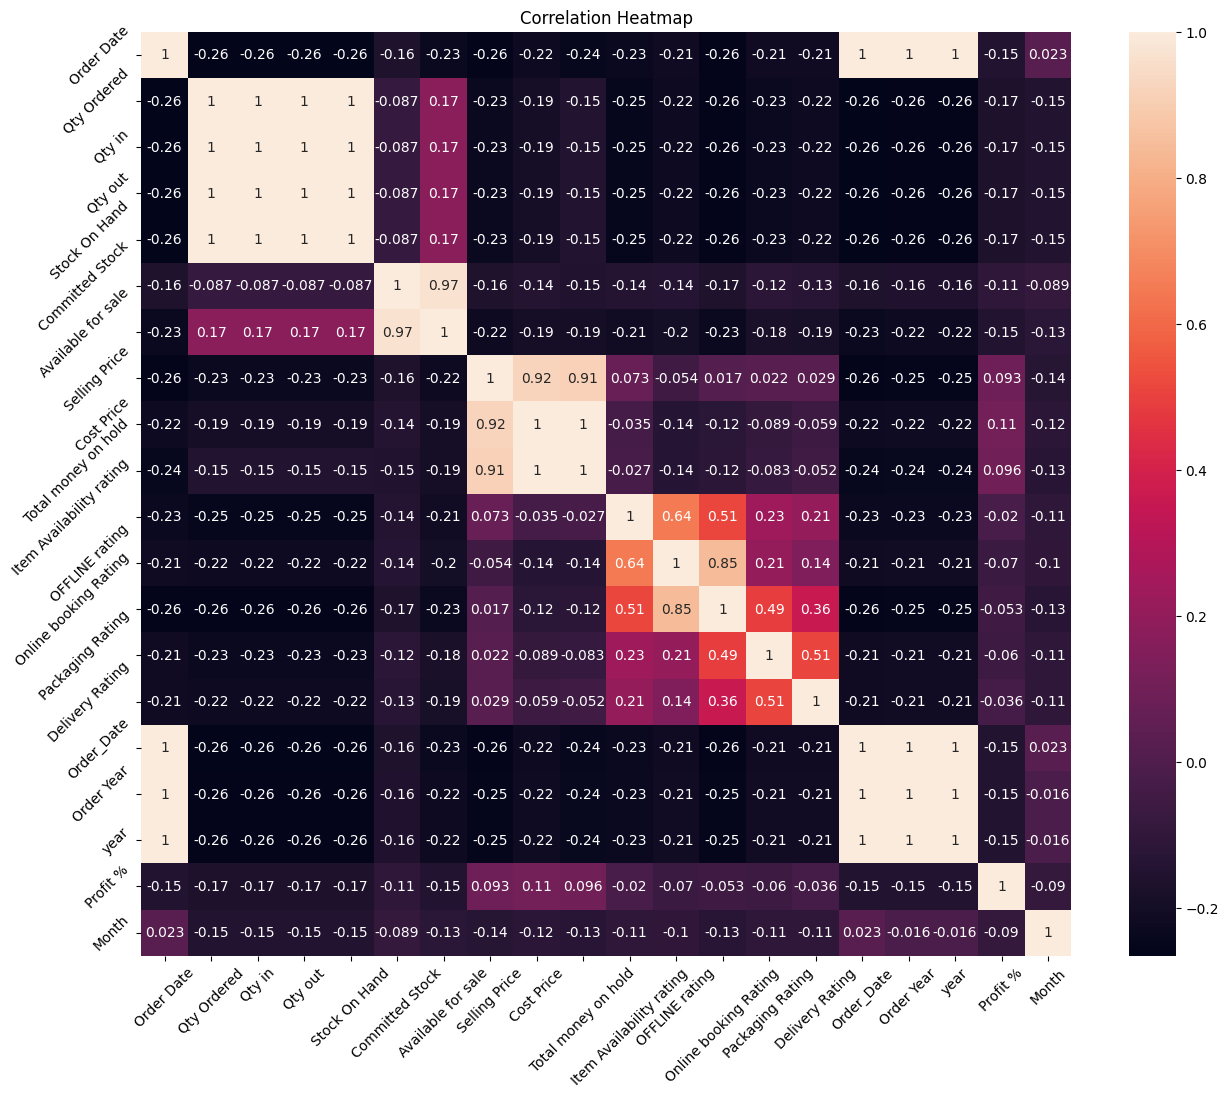

In [ ]:
# Calculate the correlation matrix
correlation_matrix = correlation_matrix.drop('Order ID', axis =1)
corr = correlation_matrix.corr()

# Create a new figure for the heatmap
fig, ax = plt.subplots(figsize=(15, 12))

# Create the heatmap
sb.heatmap(corr, annot=True, ax=ax)

# Rotate x and y labels to prevent overlapping
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [ ]:
#renaming of warehouse column name
df.rename(columns={'\n          Warehouse Name\n        ' : 'Warehouse_Name'},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27727 entries, 0 to 28178
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   LIST OF ITEMS             27727 non-null  object        
 1   Warehouse_Name            27727 non-null  object        
 2   Item Type                 27727 non-null  object        
 3   Purchase Invoice Channel  27727 non-null  object        
 4   Order Priority            27727 non-null  object        
 5   Order Date                27727 non-null  datetime64[ns]
 6   Order ID                  27727 non-null  int64         
 7   Qty Ordered               27727 non-null  int64         
 8   Qty in                    27727 non-null  int64         
 9   Qty out                   27727 non-null  int64         
 10  Stock On Hand             27727 non-null  int64         
 11  Committed Stock           27727 non-null  int64         
 12  Available for sale     

##Churn

In [ ]:
df['Item Type'].unique()

array(['Cosmetics', 'Novelities', 'ExoticDrinks', 'Glass Items',
       'Clothes', 'Incense sticks', 'Office Supplies',
       'Chocolates/Biscuits', 'Exotic Chips'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

label_encoder = LabelEncoder()
df['encode_col'] = label_encoder.fit_transform(df['Item Type'])


features = ['Qty Ordered','Qty in','Qty out', 'Stock On Hand', 'Committed Stock', 'Available for sale',
            'Selling Price', 'Cost Price', 'Total money on hold', 'Item Availability rating',
            'OFFLINE rating', 'Packaging Rating', 'Delivery Rating','encode_col']

last_purchase_date_threshold = pd.Timestamp.now() - pd.Timedelta(days=90)

df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Churn'] = df['Order Date'] < last_purchase_date_threshold
df['Churn'] = df['Churn'].astype(int)

X = df[features]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9148936170212766


In [ ]:
print(last_purchase_date_threshold)

2024-01-28 20:20:25.633346


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

# Calculate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Check for overfitting using cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
mean_cv_score = np.mean(cv_scores)
print("Cross-Validation Mean Accuracy:", mean_cv_score)

# Check if the model is overfitting
if accuracy > mean_cv_score:
    print("The model may be overfitting.")
else:
    print("The model is not overfitting.")

Confusion Matrix:
[[   0  472]
 [   0 5074]]
Sensitivity: 1.0
Specificity: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       472
           1       0.91      1.00      0.96      5074

    accuracy                           0.91      5546
   macro avg       0.46      0.50      0.48      5546
weighted avg       0.84      0.91      0.87      5546



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Mean Accuracy: 0.9113138836851684
The model may be overfitting.


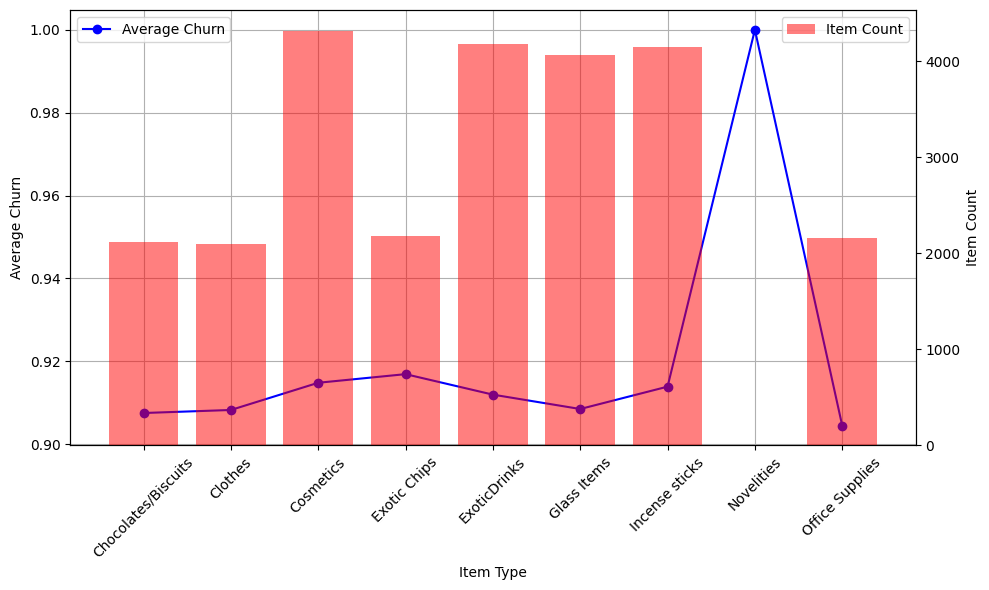

In [ ]:
#churn plot
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))
avg_churn_item_type = df.groupby('Item Type')['Churn'].mean()
ax1.plot(avg_churn_item_type.index, avg_churn_item_type.values, marker='o', color='blue', linestyle='-', label='Average Churn')
ax1.set_xlabel('Item Type')
ax1.set_ylabel('Average Churn')
ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
ax1.grid(True)

ax2 = ax1.twinx()
sum_churn_item_type = df.groupby('Item Type')['Churn'].sum()

ax2.bar(sum_churn_item_type.index, sum_churn_item_type.values, color='red', alpha=0.5, label='Item Count')
ax2.set_ylabel('Item Count')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Handling Categorical Features

In [ ]:
df['Purchase Invoice Channel'].value_counts()

Purchase Invoice Channel
Offline    14006
Online     13721
Name: count, dtype: int64

In [ ]:
df['Purchase Invoice Channel'].replace({'Offline':1,'Online':0},inplace=True)

In [ ]:
df['status'].value_counts()

status
active      27707
inactive       20
Name: count, dtype: int64

In [ ]:
df['status'].replace({'active':1,'inactive':0},inplace=True)

In [ ]:
df['unit'].value_counts()

unit
Pcs                21190
PCS                 2321
pcs                 2230
BOX                 1213
box                  653
CASE                  31
PACK                  31
DISPLAY               26
JAR                   10
Box                    6
BAG                    3
PSC                    3
PC                     3
PCS4                   2
BO                     1
80X                    1
PCS716165291053        1
P S                    1
PCS7.50                1
Name: count, dtype: int64

In [ ]:
df.drop('unit',axis = 1 , inplace=True)

In [ ]:
df['Order Priority'].value_counts()

Order Priority
LOW              7032
HIGH             6947
MOST PRIORITY    6901
MEDIUM           6845
LOW/MEDIUM          2
Name: count, dtype: int64

In [ ]:
# First merging the LOW/Medium Order Priority as Medium as it is only 2 records
df.replace({'LOW/MEDIUM' :'MEDIUM'},inplace=True)
# Now replacing this Order Priority based on order as it Ordinal Column
df.replace({'MOST PRIORITY':3 , 'HIGH':2 ,'MEDIUM' : 1 , 'LOW':0},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27727 entries, 0 to 28178
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   LIST OF ITEMS             27727 non-null  object        
 1   Warehouse_Name            27727 non-null  object        
 2   Item Type                 27727 non-null  object        
 3   Purchase Invoice Channel  27727 non-null  int64         
 4   Order Priority            27727 non-null  int64         
 5   Order Date                27727 non-null  datetime64[ns]
 6   Order ID                  27727 non-null  int64         
 7   Qty Ordered               27727 non-null  int64         
 8   Qty in                    27727 non-null  int64         
 9   Qty out                   27727 non-null  int64         
 10  Stock On Hand             27727 non-null  int64         
 11  Committed Stock           27727 non-null  int64         
 12  Available for sale     

In [ ]:
# Creating a dummies variable for Warehouse_Name , Item_Type as it Nominal Col

df = pd.get_dummies(df,columns = ['Warehouse_Name','Item Type'])

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27727 entries, 0 to 28178
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   LIST OF ITEMS                            27727 non-null  object        
 1   Purchase Invoice Channel                 27727 non-null  int64         
 2   Order Priority                           27727 non-null  int64         
 3   Order Date                               27727 non-null  datetime64[ns]
 4   Order ID                                 27727 non-null  int64         
 5   Qty Ordered                              27727 non-null  int64         
 6   Qty in                                   27727 non-null  int64         
 7   Qty out                                  27727 non-null  int64         
 8   Stock On Hand                            27727 non-null  int64         
 9   Committed Stock                          277

In [ ]:
df.columns.tolist()

['LIST OF ITEMS',
 'Purchase Invoice Channel',
 'Order Priority',
 'Order Date',
 'Order ID',
 'Qty Ordered',
 'Qty in',
 'Qty out',
 'Stock On Hand',
 'Committed Stock',
 'Available for sale',
 'status',
 'Selling Price',
 'Cost Price',
 'created_by',
 'Total money on hold',
 'Item Availability rating',
 'OFFLINE rating',
 'Online booking Rating',
 'Packaging Rating',
 'Delivery Rating',
 'Order_Date',
 'Order Year',
 'year',
 'Profit %',
 'Month',
 'encode_col',
 'Churn',
 'Warehouse_Name_TEXAS DISTRIBUTION',
 'Warehouse_Name_TX Boyz WHOLESALE-khaled',
 'Warehouse_Name_TX Boyz Wholesale',
 'Warehouse_Name_Tx Boyz Wholesale A#103',
 'Item Type_Chocolates/Biscuits',
 'Item Type_Clothes',
 'Item Type_Cosmetics',
 'Item Type_Exotic Chips',
 'Item Type_ExoticDrinks',
 'Item Type_Glass Items',
 'Item Type_Incense sticks',
 'Item Type_Novelities',
 'Item Type_Office Supplies']

In [ ]:
df['Customer Satisfication']  = (df[['Item Availability rating',
 'OFFLINE rating',
 'Online booking Rating',
 'Packaging Rating',
 'Delivery Rating']].sum(axis=1) > 15).astype(int)

df['Customer Satisfication'].value_counts()

Customer Satisfication
1    17646
0    10081
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Customer Satisfication > 15

In [ ]:
# Splitting the data into 0.7 train , 0.3 test data

Indepedent_feature = [
 'Purchase Invoice Channel',
 'Order Priority',
 'Qty Ordered',
 'Qty in',
 'Qty out',
 'Stock On Hand',
 'Committed Stock',
 'Available for sale',
 'status',
 'Selling Price',
 'Cost Price',
 'Total money on hold',
 'Customer Satisfication',
 'Warehouse_Name_TEXAS DISTRIBUTION',
 'Warehouse_Name_TX Boyz WHOLESALE-khaled',
 'Warehouse_Name_TX Boyz Wholesale',
 'Warehouse_Name_Tx Boyz Wholesale A#103',
 'Item Type_Chocolates/Biscuits',
 'Item Type_Clothes',
 'Item Type_Cosmetics',
 'Item Type_Exotic Chips',
 'Item Type_ExoticDrinks',
 'Item Type_Glass Items',
 'Item Type_Incense sticks',
 'Item Type_Novelities',
 'Item Type_Office Supplies' ]
final_df = df[Indepedent_feature]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27727 entries, 0 to 28178
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Purchase Invoice Channel                 27727 non-null  int64  
 1   Order Priority                           27727 non-null  int64  
 2   Qty Ordered                              27727 non-null  int64  
 3   Qty in                                   27727 non-null  int64  
 4   Qty out                                  27727 non-null  int64  
 5   Stock On Hand                            27727 non-null  int64  
 6   Committed Stock                          27727 non-null  int64  
 7   Available for sale                       27727 non-null  int64  
 8   status                                   27727 non-null  int64  
 9   Selling Price                            27727 non-null  float64
 10  Cost Price                               27727 non-

In [ ]:
Y = final_df['Customer Satisfication']
X = final_df.drop('Customer Satisfication', axis=1)
X_train , X_test , Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=342)
print("Train Size : {}".format(len(X_train)))
print("Test Size : {}".format(len(X_test)))

Train Size : 19408
Test Size : 8319


In [ ]:
pipelines ={
    'lr' : make_pipeline(StandardScaler(),LogisticRegression(penalty='l2',random_state =123)),
    'rf'  : make_pipeline(StandardScaler(),RandomForestClassifier(random_state=123)),
    'dt' : make_pipeline(StandardScaler(),DecisionTreeClassifier(random_state=123))
  }

In [ ]:
lr_hyperparamter = {
'logisticregression__C':[0.001,0.005,0.01,0.5]
}

In [ ]:
pipelines['rf'].get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestclassifier', RandomForestClassifier(random_state=123))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestclassifier': RandomForestClassifier(random_state=123),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomfo

In [ ]:
rf_hyperparameter = {
    'randomforestclassifier__max_depth' : [ 1,2,5,10,12],
    'randomforestclassifier__n_estimators' : [100,200,400,500],
    'randomforestclassifier__max_features' : ['sqrt','log2']}


In [ ]:
pipelines['dt'].get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('decisiontreeclassifier', DecisionTreeClassifier(random_state=123))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'decisiontreeclassifier': DecisionTreeClassifier(random_state=123),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'decisiontreeclassifier__ccp_alpha': 0.0,
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_decrease': 0.0,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0,
 'decisiontreeclassifier__random_state': 123,
 'decisiontreeclassifier__splitter': 'best'}

In [ ]:
dt_hyperparameter = {
    'decisiontreeclassifier__max_depth': [1,5,10],
    'decisiontreeclassifier__min_samples_split' :[0.1,0.2,0.5,0.05],
   'decisiontreeclassifier__max_features': [ 'sqrt', 'log2'],
    'decisiontreeclassifier__criterion': ['gini','entropy'],
    'decisiontreeclassifier__min_samples_leaf' :[0.1,0.2,0.5,0.05]

}


In [ ]:
Hyperparamter = {
    'lr' : lr_hyperparamter ,
    'rf' : rf_hyperparameter,
    'dt' :dt_hyperparameter
}


In [ ]:
# Fit and Tune models with Cross-Validation

from sklearn.model_selection import GridSearchCV

fitted_models={}

for name , pipeline in pipelines.items() :

    model = GridSearchCV(pipeline ,Hyperparamter[name],cv=5,n_jobs=-1)

    model.fit(X_train,Y_train)

    fitted_models[name] = model

    print(name, 'has been fitted')

lr has been fitted
rf has been fitted
dt has been fitted




It takes 16 minutes t0 run this model

In [ ]:
fitted_models['rf']
fitted_models['lr']


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(random_state=123))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.001, 0.005, 0.01, 0.5]})

In [ ]:
from sklearn.metrics import accuracy_score
for name ,model in fitted_models.items():
    pred=model.predict(X_train)
    print("NAME :",name)
    print('----------------')


    print("Accuracy SCORE:",accuracy_score(Y_train,pred))
    print('----------------')

NAME : lr
----------------
Accuracy SCORE: 0.6598309975267931
----------------
NAME : rf
----------------
Accuracy SCORE: 0.6809047815333883
----------------
NAME : dt
----------------
Accuracy SCORE: 0.6629225061830173
----------------


In [ ]:
from sklearn.metrics import accuracy_score



for name ,model in fitted_models.items():
    pred=model.predict(X_test)
    print("NAME :",name)
    print('----------------')


    print("Accuracy SCORE:",accuracy_score(Y_test,pred))
    print('----------------')

NAME : lr
----------------
Accuracy SCORE: 0.666185839644188
----------------
NAME : rf
----------------
Accuracy SCORE: 0.6768842408943383
----------------
NAME : dt
----------------
Accuracy SCORE: 0.6684697680009617
----------------


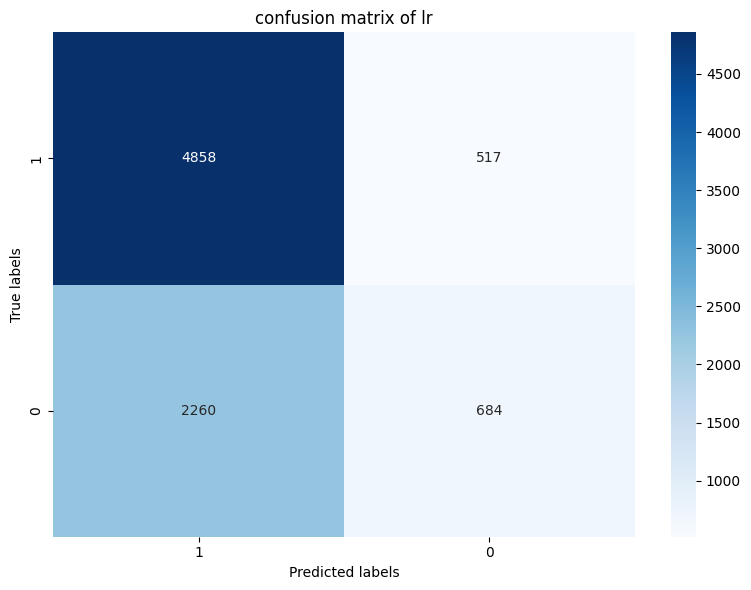

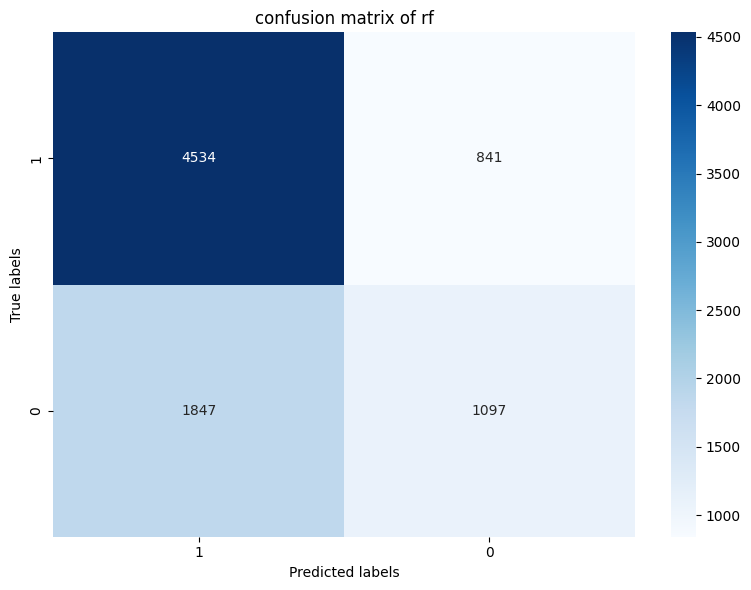

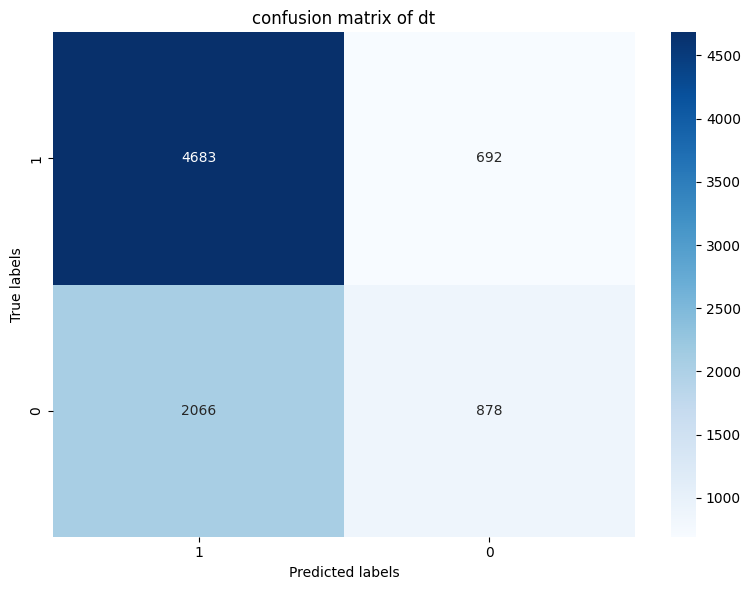

In [ ]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix

labels = [1, 0]

accuracy_list = []
specificity_list= []
sensitivity_list = []
for name, model in fitted_models.items() :
    y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, y_pred ,labels=[1,0])
    TP = cm[0, 0]
    FN = cm[0, 1]
    FP = cm[1, 0]
    TN = cm[1, 1]
    accuracy_list.append(accuracy_score(Y_test,y_pred))
    specificity_list.append(TN/(FP+TN))
    sensitivity_list.append(TP/(FN+TP))

# Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sb.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('confusion matrix of ' + name)
    plt.tight_layout()
    plt.show()

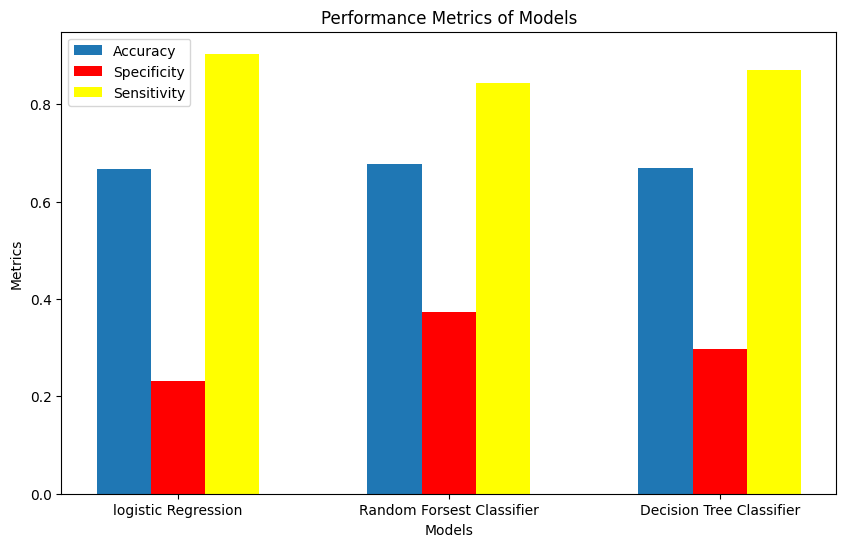

In [ ]:
# Create bar plot
model_names = ['logistic Regression','Random Forsest Classifier','Decision Tree Classifier']
plt.figure(figsize=(10, 6))

# Plotting accuracy
plt.bar([x - 0.2 for x in range(len(fitted_models))],accuracy_list, width=0.2, label='Accuracy')
# Plotting specificity
plt.bar([x for x in range(len(fitted_models))], specificity_list, width=0.2, label='Specificity', color = 'red')
# Plotting sensitivity
plt.bar([x + 0.2 for x in range(len(fitted_models))], sensitivity_list, width=0.2, label='Sensitivity', color = 'yellow')

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Performance Metrics of Models')
plt.xticks(range(len(model_names)),model_names  )
plt.legend()
plt.show()